In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
import warnings
warnings.simplefilter(action='ignore')

## Lecture 11

## `join()` vs `with_column()`

### Example 1: Sections

In [2]:
sections = Table().with_columns('Section No', [1,2,3,4,5,6], 
                                'Room', ['PHELP 1445', 'NH 1111', 'NH 1109', 'ARTS 1349', 'PHELP 2514', 'PHELP 2514'])
sections

Section No,Room
1,PHELP 1445
2,NH 1111
3,NH 1109
4,ARTS 1349
5,PHELP 2514
6,PHELP 2514


In [3]:
tas = ['Steven', 'Danish', 'Aman', 'Christos', 'Vanessa', 'Sean']
sections.with_column('tas', tas)

Section No,Room,tas
1,PHELP 1445,Steven
2,NH 1111,Danish
3,NH 1109,Aman
4,ARTS 1349,Christos
5,PHELP 2514,Vanessa
6,PHELP 2514,Sean


In [4]:
rooms = ['PHELP 1445', 'NH 1111', 'NH 1109', 'ARTS 1349', 'PHELP 2514'] # create a list
url = []
capacity = [35, 48, 35, 43, 35] # create columns as lists and then populate them into a table later
renovation = [2018, 2017, 2018, 2018, 2018]
rooms = Table().with_columns('room', rooms, 'capacity', capacity, 'renovated', renovation) # add lists to a table
rooms

room,capacity,renovated
PHELP 1445,35,2018
NH 1111,48,2017
NH 1109,35,2018
ARTS 1349,43,2018
PHELP 2514,35,2018


### Example 2: Flights

In [5]:
def distance(lat1, lon1, lat2, lon2):
    # Haversine Formula
    r_earth = 4000 #miles
    lat1 = np.deg2rad(lat1)
    lon1 = np.deg2rad(lon1)
    lat2 = np.deg2rad(lat2)
    lon2 = np.deg2rad(lon2)
    
    distance = np.arccos(np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(lon2-lon1)) * r_earth
    return distance

In [11]:
Table.read_table('data/flights.csv').group('month')

month,count
1,27004
2,24951
3,28834
4,28330
5,28796
6,28243
7,29425
8,29327
9,27574
10,28889


In [12]:
flights = Table.read_table('data/flights.csv').select('carrier', 'flight', 'origin', 'air_time', 'dest')
airports = Table.read_table('data/airports.csv').select('faa', 'lat', 'lon')
airports

faa,lat,lon
04G,41.1305,-80.6196
06A,32.4606,-85.68
06C,41.9893,-88.1012
06N,41.4319,-74.3916
09J,31.0745,-81.4278
0A9,36.3712,-82.1734
0G6,41.4673,-84.5068
0G7,42.8836,-76.7812
0P2,39.7948,-76.6472
0S9,48.0538,-122.811


**Tasks**
We want to get the distribution of the airspeeds

- join the airports with the flight data to get location information about origin and destination location
    - We need to join the airport table twice; 
    - therefore we should create two copies of the airports table with distinct labels
- apply the havesine formula to get an approximation of the distances between origin and destinations
- calculate the speed
- create a histogram

In [15]:
flights

carrier,flight,origin,air_time,dest
UA,1545,EWR,227,IAH
UA,1714,LGA,227,IAH
AA,1141,JFK,160,MIA
B6,725,JFK,183,BQN
DL,461,LGA,116,ATL
UA,1696,EWR,150,ORD
B6,507,EWR,158,FLL
EV,5708,LGA,53,IAD
B6,79,JFK,140,MCO
AA,301,LGA,138,ORD


In [17]:
airports.sort('faa', descending = True)

faa,lat,lon
ZYP,40.7505,-73.9935
ZWU,38.8975,-77.0064
ZWI,39.7367,-75.5517
ZVE,41.2987,-72.926
ZUN,35.0832,-108.792
ZTY,42.3478,-71.075
ZTF,41.0469,-73.5415
ZSY,33.6229,-111.911
ZSF,42.106,-72.5931
ZRZ,38.948,-76.8719


In [14]:
airports_origin = airports.relabeled('lat','lat_o').relabeled('lon','lon_o')
airports_dest = airports.relabeled('lat','lat_d').relabeled('lon','lon_d')

In [20]:
flights = Table.read_table('data/flights.csv').select('carrier', 'flight', 'origin', 'air_time', 'dest')


In [21]:
flights = flights.join('origin', airports_origin, 'faa')
flights = flights.join('dest', airports_dest, 'faa')
flights

dest,origin,carrier,flight,air_time,lat_o,lon_o,lat_d,lon_d
ABQ,JFK,B6,65,230,40.6398,-73.7789,35.0402,-106.609
ABQ,JFK,B6,65,238,40.6398,-73.7789,35.0402,-106.609
ABQ,JFK,B6,65,251,40.6398,-73.7789,35.0402,-106.609
ABQ,JFK,B6,65,257,40.6398,-73.7789,35.0402,-106.609
ABQ,JFK,B6,65,242,40.6398,-73.7789,35.0402,-106.609
ABQ,JFK,B6,65,240,40.6398,-73.7789,35.0402,-106.609
ABQ,JFK,B6,65,246,40.6398,-73.7789,35.0402,-106.609
ABQ,JFK,B6,65,233,40.6398,-73.7789,35.0402,-106.609
ABQ,JFK,B6,65,236,40.6398,-73.7789,35.0402,-106.609
ABQ,JFK,B6,65,245,40.6398,-73.7789,35.0402,-106.609


In [23]:
dist = flights.apply(distance, 'lat_o', 'lon_o', 'lat_d','lon_d')
flights = flights.with_column('distance', dist)
flights

dest,origin,carrier,flight,air_time,lat_o,lon_o,lat_d,lon_d,distance
ABQ,JFK,B6,65,230,40.6398,-73.7789,35.0402,-106.609,1840.5
ABQ,JFK,B6,65,238,40.6398,-73.7789,35.0402,-106.609,1840.5
ABQ,JFK,B6,65,251,40.6398,-73.7789,35.0402,-106.609,1840.5
ABQ,JFK,B6,65,257,40.6398,-73.7789,35.0402,-106.609,1840.5
ABQ,JFK,B6,65,242,40.6398,-73.7789,35.0402,-106.609,1840.5
ABQ,JFK,B6,65,240,40.6398,-73.7789,35.0402,-106.609,1840.5
ABQ,JFK,B6,65,246,40.6398,-73.7789,35.0402,-106.609,1840.5
ABQ,JFK,B6,65,233,40.6398,-73.7789,35.0402,-106.609,1840.5
ABQ,JFK,B6,65,236,40.6398,-73.7789,35.0402,-106.609,1840.5
ABQ,JFK,B6,65,245,40.6398,-73.7789,35.0402,-106.609,1840.5


In [25]:
speed = flights.column('distance') / flights.column('air_time') * 60
flights = flights.with_column('speed',speed)
flights

dest,origin,carrier,flight,air_time,lat_o,lon_o,lat_d,lon_d,distance,speed
ABQ,JFK,B6,65,230,40.6398,-73.7789,35.0402,-106.609,1840.5,480.13
ABQ,JFK,B6,65,238,40.6398,-73.7789,35.0402,-106.609,1840.5,463.991
ABQ,JFK,B6,65,251,40.6398,-73.7789,35.0402,-106.609,1840.5,439.96
ABQ,JFK,B6,65,257,40.6398,-73.7789,35.0402,-106.609,1840.5,429.689
ABQ,JFK,B6,65,242,40.6398,-73.7789,35.0402,-106.609,1840.5,456.322
ABQ,JFK,B6,65,240,40.6398,-73.7789,35.0402,-106.609,1840.5,460.125
ABQ,JFK,B6,65,246,40.6398,-73.7789,35.0402,-106.609,1840.5,448.902
ABQ,JFK,B6,65,233,40.6398,-73.7789,35.0402,-106.609,1840.5,473.948
ABQ,JFK,B6,65,236,40.6398,-73.7789,35.0402,-106.609,1840.5,467.924
ABQ,JFK,B6,65,245,40.6398,-73.7789,35.0402,-106.609,1840.5,450.735


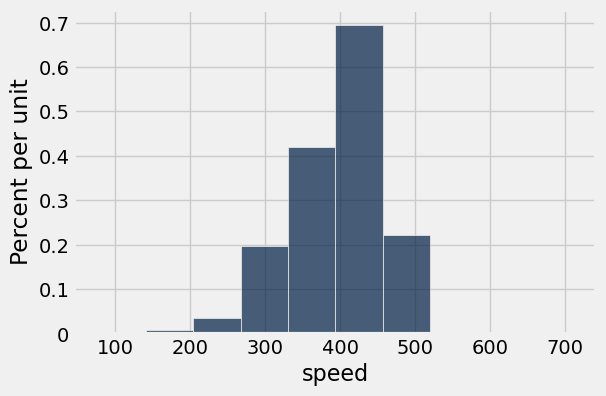

In [26]:
flights.hist('speed')

---
Back to slides

---

## Bike Sharing ##

In [ ]:
trip = Table.read_table('data/trip.csv')
trip.show(3)

## Distribution of Durations ##

In [ ]:
trip.hist('Duration')

**Question** What is going on??

In [ ]:
trip.sort('Duration', descending=True)

**Task** 
- Let's find trips that were shorter than 30 minutes and create a histogram of those
- Let's set the bins to 5 minute bins and add a unit

**Question**
What share of trips was between 5 and 10 minutes?
- eyeball from reading the histogram
- find the exact value (using table functions)

In [ ]:
# Eyeball:


In [ ]:
# Exact:


## Start and End Stations 
- How many (start) stations are there?
- let's find the most common start station

**Tasks**

let's
- find the count of trips between each station combination
    - Why do we have a trip count of 0 for some of the combinations?
    - Is it plausible that there are trips that start and stop at the same station? 
- find the average trip time between each station
    - The average might be skewed by people taking a long time because they e.g. got food on the way. 
    - How could we find the typical trip time between each station? 
    - Or maybe the fastest?

**Question:** Should we use `group()` or `pivot()`?

## Discussion question
Find the 5 stations closest to Civic Center BART by minimum trip time.

Things you need to do:
- find all the trips that start at `Civic Center BART (7th at Market)`
- find the shortest trip between stations
- optionally, subset the dataset to only the relevant columns

## Maps 
Geographical data on the stations


In [ ]:
stations = Table.read_table('data/station.csv').drop(4, 6)
stations

In [ ]:
sf_stations = stations.where('landmark', are.equal_to('San Francisco'))
sf_stations_map_data = (sf_stations.select('lat', 'long', 'name').relabeled('name', 'labels'))
sf_stations_map_data.show(3)

In [ ]:
Marker.map_table(sf_stations_map_data)

In [ ]:
Circle.map_table(sf_stations_map_data)

### Discussion question

Map all stations within 4 minutes (minimum ride time) of Civic Center.

## Example Questions

For each of the following, write a Python expression that returns the given data:

1. The name of the station where most rentals ended
2. The number of stations for which the average duration of trips ending at that station was more than 10 minutes
3. The number of stations that have more than 500 starts and more than 500 ends.